In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [ ]:
# ----------------------------
# 1. MODEL BUILDING & TRAINING
# ----------------------------
# Load the dataset of Churn
df = pd.read_csv("/content/Churn (1).csv")

In [ ]:
# 2. Since 'Churn' is True/False, converting it to 1/0
df['Churn'] = df['Churn'].apply(lambda x: 1 if x else 0)
#Dividing data into features and labels. Selecting all columns except those that
#would make no impact on Churn (area code)
y = df['Churn']

In [ ]:
# 3. Picking the columns we will use to make predictions (things like call time, charges,
# and customer service calls) and saving them in X for later use in the model

feature_columns = [
    'Account length',
    'Total day minutes', 'Total day calls', 'Total day charge',
    'Total eve minutes', 'Total eve calls', 'Total eve charge',
    'Total night minutes', 'Total night calls', 'Total night charge',
    'Total intl minutes', 'Total intl calls', 'Total intl charge',
    'Customer service calls'
]
X=df[feature_columns]

In [ ]:
# 4. Spliting the data into training set and test set. This command splits the dataset into
#80% train data and 20% test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
# 5.Creating a tool (scaler) that will adjust the data so all features are on the same scale
scaler = StandardScaler()
# Fit on training data and transform both train & test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

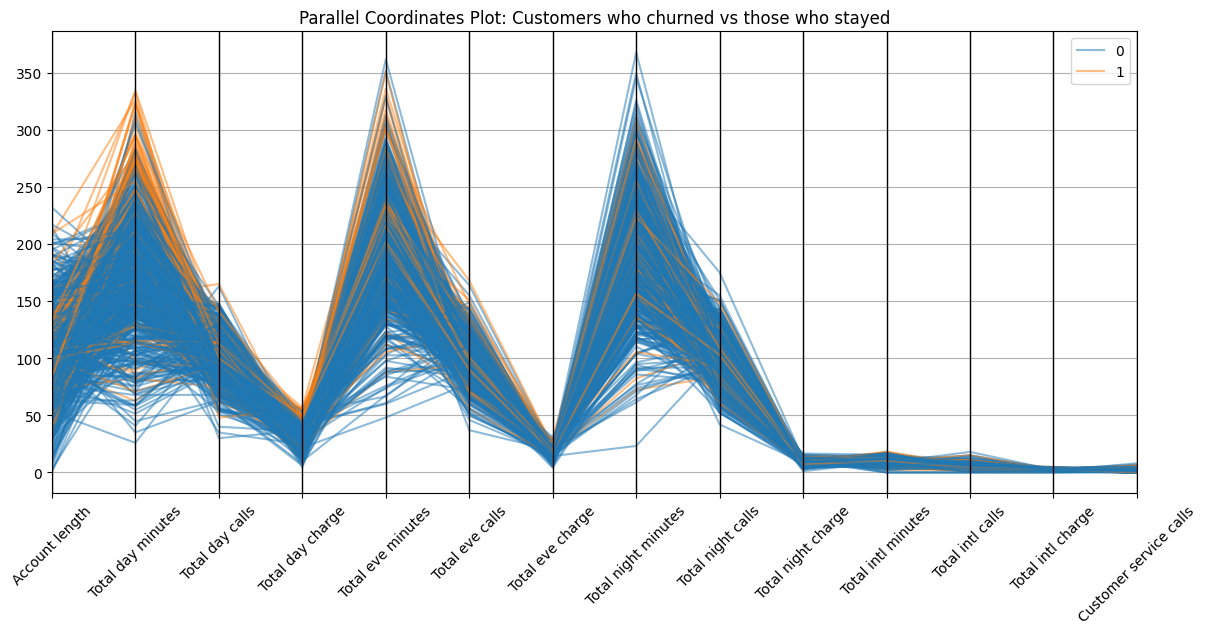

In [ ]:
# 6. Making a copy of the features (X) and adding the target column (Churn) for plotting.
# Creating a parallel coordinates plot to compare how different features vary
# between customers who churned vs. those who stayed.


viz_df = X.copy()
viz_df['Churn'] = y

plt.figure(figsize=(14,6))
parallel_coordinates(viz_df, 'Churn', color=['#1f77b4', '#ff7f0e'], alpha=0.5)
plt.title("Parallel Coordinates Plot: Customers who churned vs those who stayed")
plt.xticks(rotation=45)
plt.show()

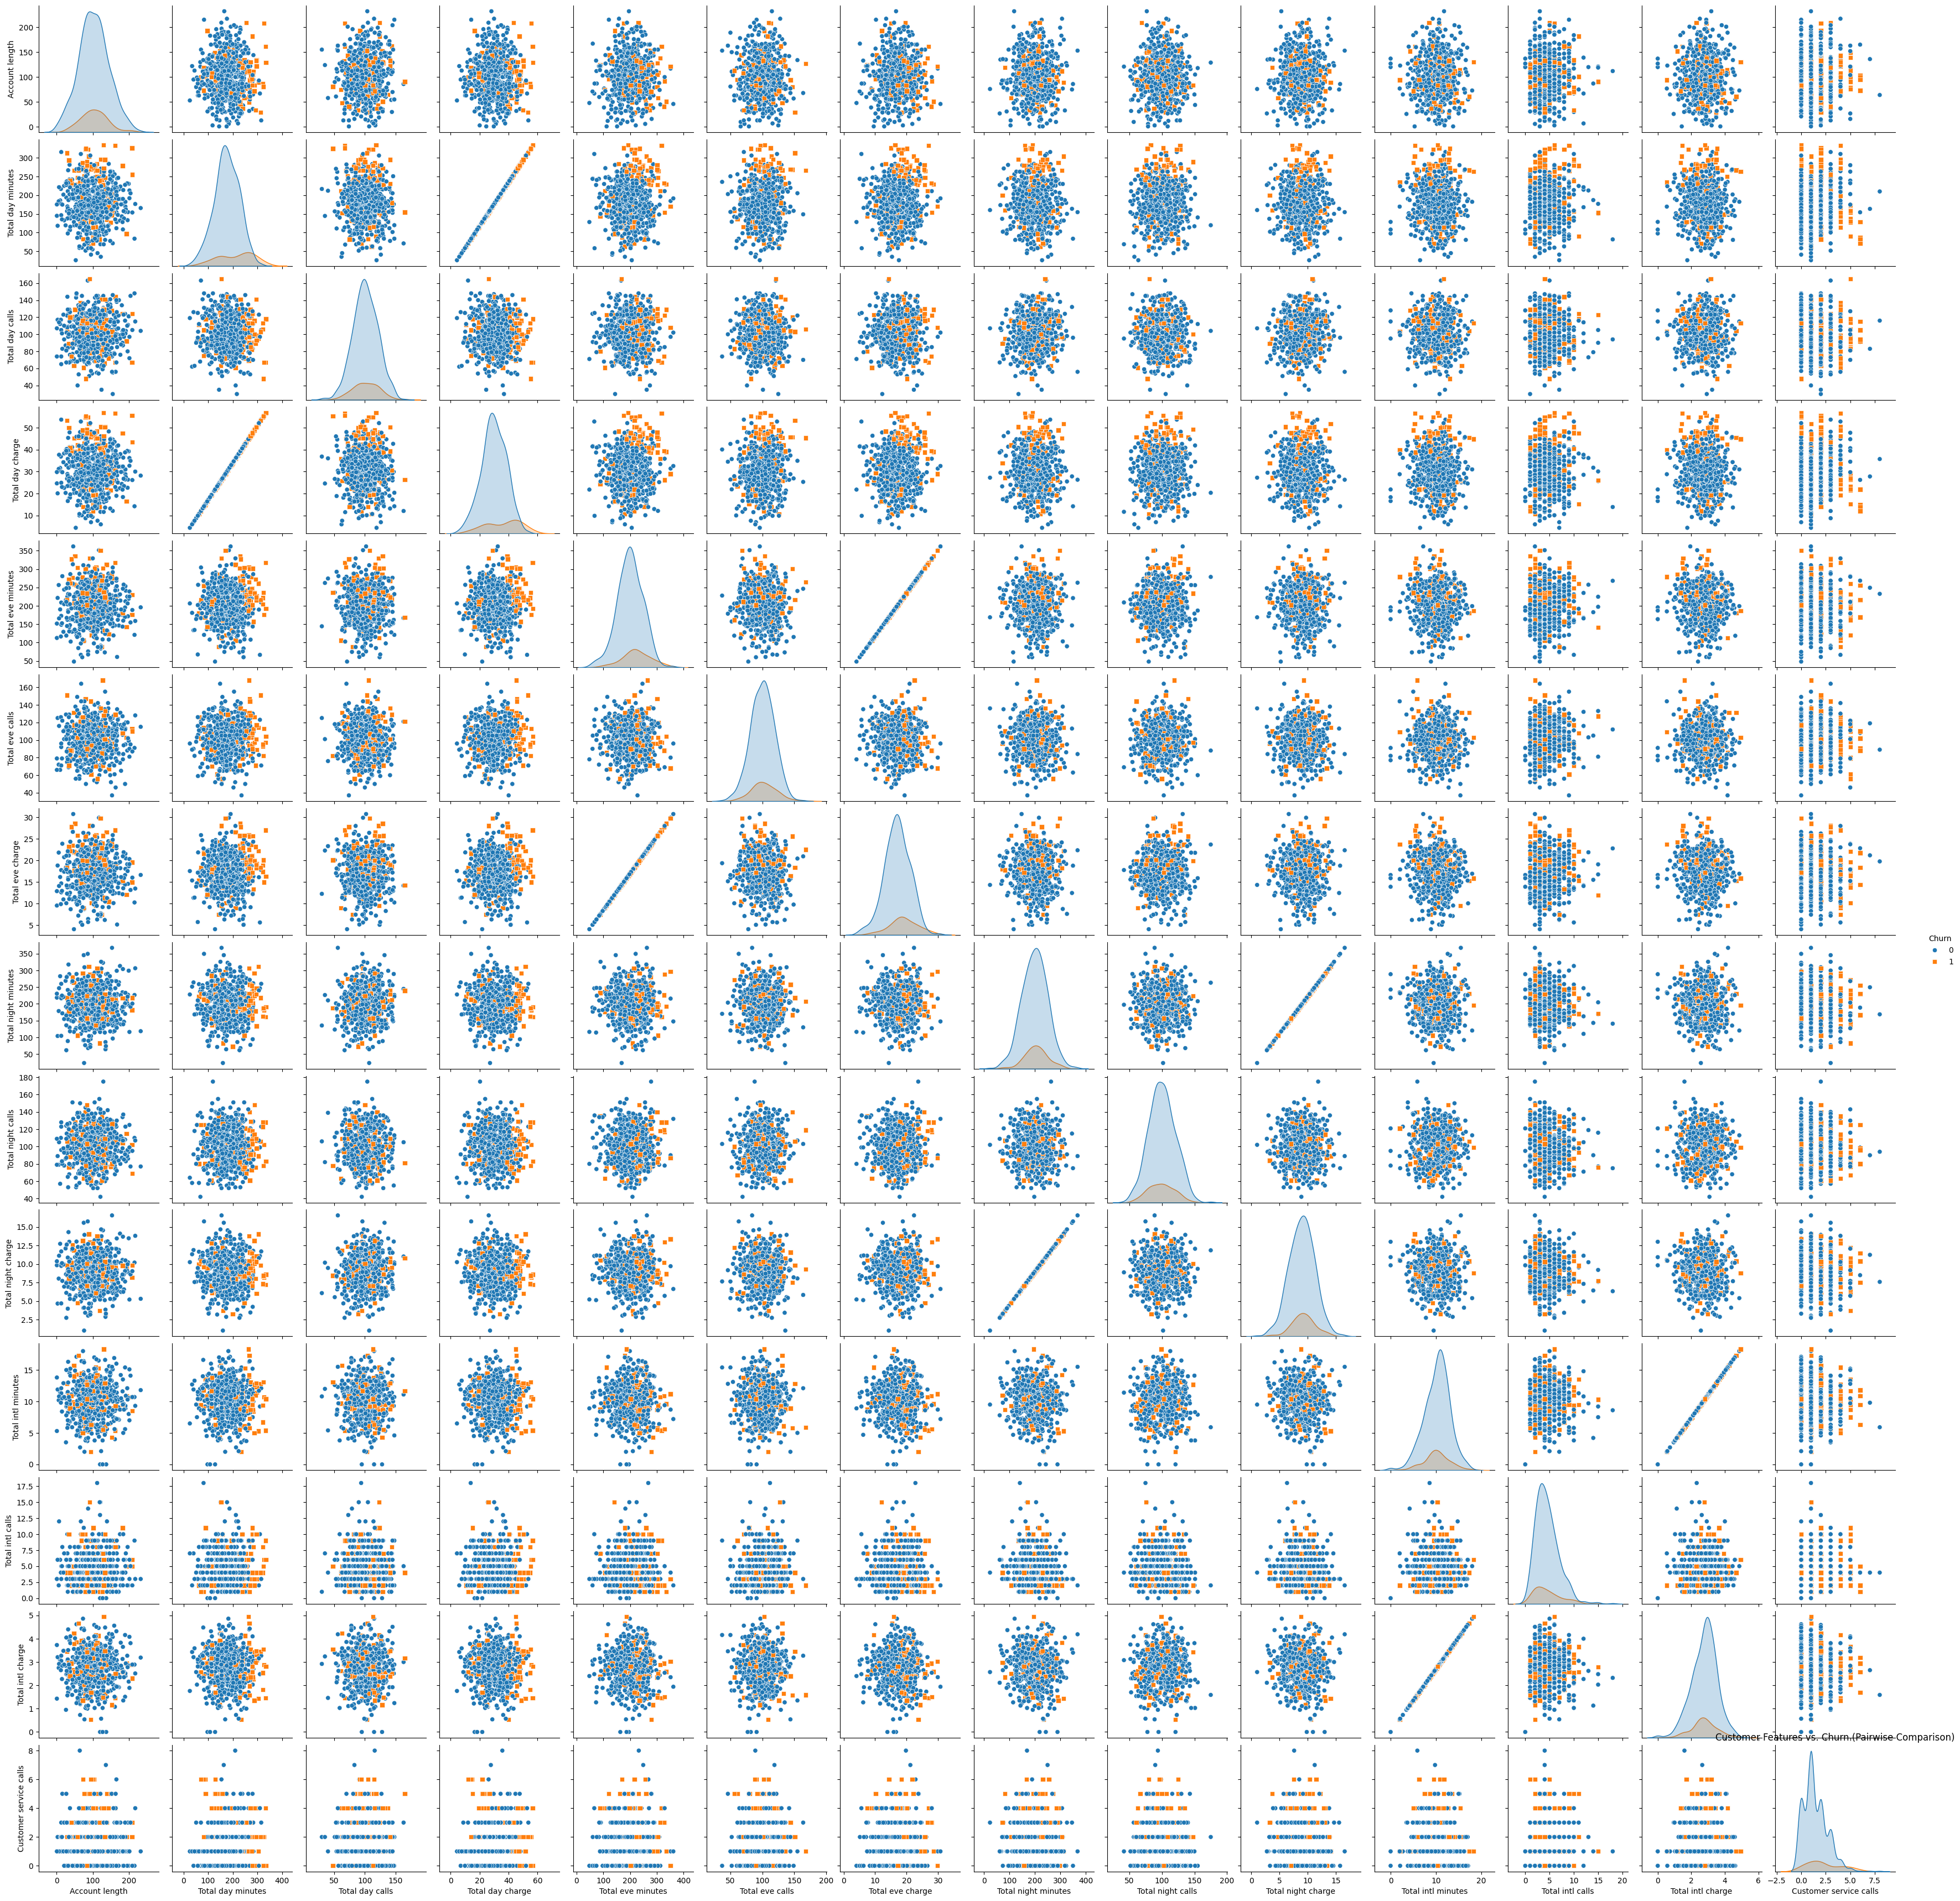

In [ ]:
# 7. Making a copy of the features (X) and add the target column (Churn)
# so we can visualize how churn relates to other features.
viz_df = X.copy()
viz_df['Churn'] = y

# Creating a pairplot: this shows scatterplots for each pair of features,
# with points colored by Churn. The diagonal shows the distribution
# (shape) of each feature. Useful for spotting patterns or differences.
sns.pairplot(viz_df, hue="Churn", diag_kind="kde", markers=["o", "s"])
plt.title("Customer Features vs. Churn (Pairwise Comparison)")
plt.show()

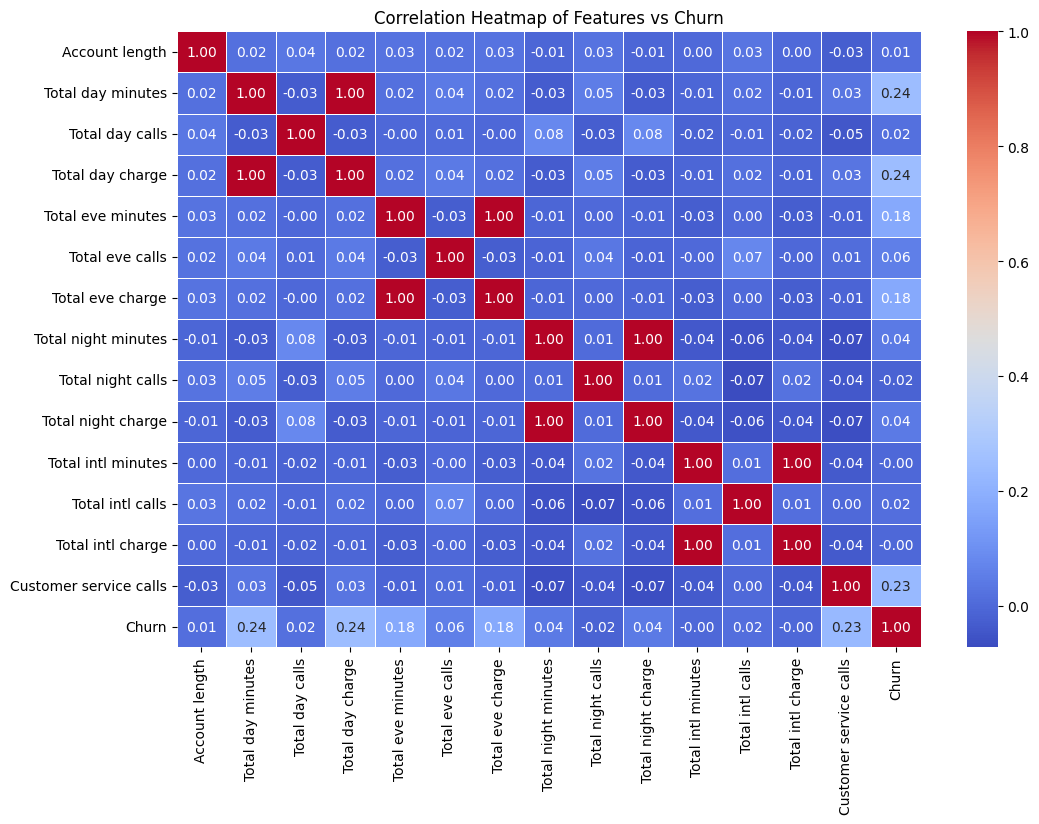

In [ ]:
# 8. Calculating the correlation between all features and churn
# (how strongly each feature is related to the others and to churn).

plt.figure(figsize=(12,8))
corr = viz_df.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# Drawing a heatmap to show the strength and direction of these relationships.
plt.title("Correlation Heatmap of Features vs Churn")
plt.show()

In [ ]:


# ----------------------------
# 2. BUILDING AND TESTING A KNN MODEL TO PREDICT CUSTOMER CHURN
# ----------------------------


# Example: assuming df is my dataset and has features + target
# X = features, y = target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize KNN classifier with k=3 (neighbors)
knn = KNeighborsClassifier(n_neighbors=3)

# Train model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8706467661691543
Confusion Matrix:
 [[165   8]
 [ 18  10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       173
           1       0.56      0.36      0.43        28

    accuracy                           0.87       201
   macro avg       0.73      0.66      0.68       201
weighted avg       0.85      0.87      0.86       201



In [ ]:
# Fiting KNN to training data
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)  # start with k=3
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Predictions
y_pred = knn.predict(X_test)

# Evaluate performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8706467661691543

Confusion Matrix:
 [[165   8]
 [ 18  10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       173
           1       0.56      0.36      0.43        28

    accuracy                           0.87       201
   macro avg       0.73      0.66      0.68       201
weighted avg       0.85      0.87      0.86       201



In [ ]:
# Checking KNN model accuracy using 10 rounds of testing (cross-validation)

from sklearn.model_selection import cross_val_score

# Perform 10-fold cross-validation on the whole dataset
cv_scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.85074627 0.89552239 0.82089552 0.80597015 0.85074627 0.86567164
 0.80597015 0.86363636 0.87878788 0.89393939]
Mean CV Accuracy: 0.8531886024423339


In [ ]:
# Testing different neighbor values (k=1 to 20) to find which gives the most accurate predictions

error_rates = []

# Loop through k values 1 to 20
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    error = 1 - cv_scores.mean()
    error_rates.append(error)

# Find the best k
best_k = error_rates.index(min(error_rates)) + 1
print("Best k:", best_k)

Best k: 14


In [ ]:

# ----------------------------
# 3. MODEL EVALUATIONS
# ----------------------------

# Subset dataset with top 5 features + target
# Keeping only the 5 most useful features (found from testing different models) + churn
# to see if fewer features can still predict well.
dataset_top_5 = df.filter([
    'Total day minutes',
    'Customer service calls',
    'Total day charge',
    'Total intl calls',
    'Total eve minutes',
    'Churn'
])

In [ ]:


# Subset dataset with top 3 features + target
# Keeping only the 3 most useful features (found from testing different models) + churn
# to see if fewer features can still predict well.
dataset_top_3 = df.filter([
    'Total day minutes',
    'Customer service calls',
    'Total day charge',
    'Churn'
])

In [ ]:
# Reload or make a copy of the original dataset
dataset_original = df.copy()

In [ ]:
# ----------------------------
# A. MODEL EVALUATION WITH THE TOP 5 FEATURE DATASET
# ----------------------------
# Subset with Top 5 features + target
dataset_top_5 = df.filter([
    'Total day minutes',
    'Customer service calls',
    'Total day charge',
    'Total intl calls',
    'Total eve minutes',
    'Churn'
])

# Split into features (X) and target (y)
X = dataset_top_5.drop('Churn', axis=1)
y = dataset_top_5['Churn']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier

# Start with K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8656716417910447

Confusion Matrix:
 [[109   6]
 [ 12   7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       115
           1       0.54      0.37      0.44        19

    accuracy                           0.87       134
   macro avg       0.72      0.66      0.68       134
weighted avg       0.85      0.87      0.85       134



In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Try different K values
errors = []
k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    errors.append(1 - scores.mean())  # Misclassification error

best_k = k_range[np.argmin(errors)]
print("Best K:", best_k)

Best K: 20


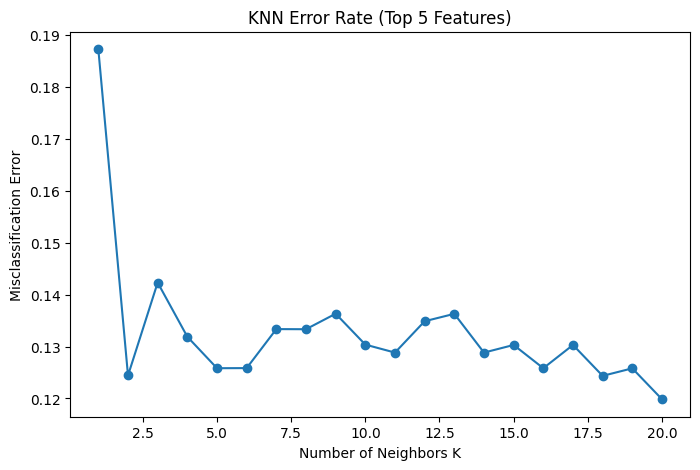

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(k_range, errors, marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.title('KNN Error Rate (Top 5 Features)')
plt.show()

In [ ]:
# ----------------------------
# B.MODEL EVALUATION WITH THE TOP 3 FEATURE DATASET
# ----------------------------

In [ ]:
# Subset dataset with top 3 features + target
dataset_top_3 = df.filter([
    'Total day minutes',
    'Customer service calls',
    'Total day charge',
    'Churn'
])

In [ ]:
# Split into features (X) and target (y)
X = dataset_top_3.drop('Churn', axis=1)
y = dataset_top_3['Churn']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Start with K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8880597014925373

Confusion Matrix:
 [[113   2]
 [ 13   6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       115
           1       0.75      0.32      0.44        19

    accuracy                           0.89       134
   macro avg       0.82      0.65      0.69       134
weighted avg       0.88      0.89      0.87       134



In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Try different K values
errors = []
k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    errors.append(1 - scores.mean())  # Misclassification error

best_k = k_range[np.argmin(errors)]
print("Best K:", best_k)

Best K: 2


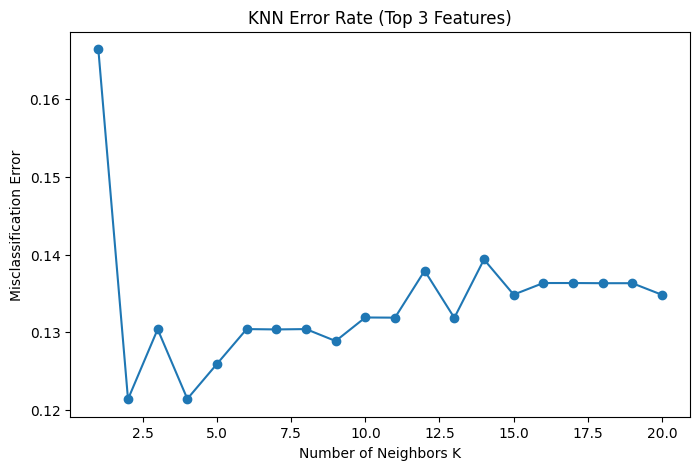

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(k_range, errors, marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.title('KNN Error Rate (Top 3 Features)')
plt.show()

In [ ]:
# ----------------------------
# C. MODEL WITH THE TOP 2 STRONGEST FEATURE DATASET
# ----------------------------


# Subset dataset with top 2 features + target

dataset_top_2= df.filter(('Total day minutes', 'Customer service calls', 'Churn'))

In [ ]:
print(dataset_top_2.columns)

Index(['Total day minutes', 'Customer service calls'], dtype='object')


In [ ]:
# Split into features (X) and target (y)
X=dataset_top_2.drop('Churn', axis=1)
y=dataset_top_2['Churn']


In [ ]:
X_test,X_train,y_test,y_train=train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Start with K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8649155722326454

Confusion Matrix:
 [[435  18]
 [ 54  26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       453
           1       0.59      0.33      0.42        80

    accuracy                           0.86       533
   macro avg       0.74      0.64      0.67       533
weighted avg       0.84      0.86      0.85       533



In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Try different K values
errors = []
k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    errors.append(1 - scores.mean())  # Misclassification error

best_k = k_range[np.argmin(errors)]
print("Best K:", best_k)

Best K: 2


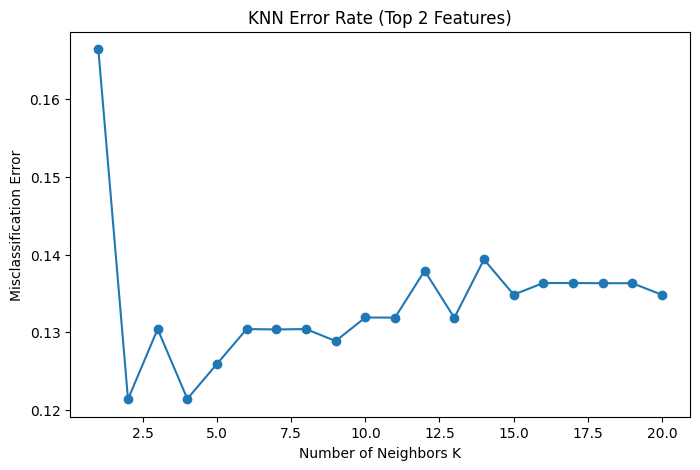

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(k_range, errors, marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.title('KNN Error Rate (Top 2 Features)')
plt.show()


================ Top 2 Features ================

Accuracy: 0.8880597014925373

Confusion Matrix:
 [[113   2]
 [ 13   6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       115
           1       0.75      0.32      0.44        19

    accuracy                           0.89       134
   macro avg       0.82      0.65      0.69       134
weighted avg       0.88      0.89      0.87       134

Best K: 2


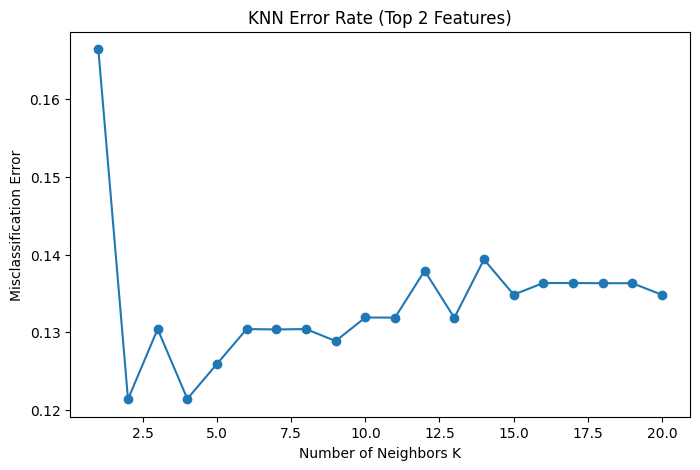


================ Top 3 Features ================

Accuracy: 0.8880597014925373

Confusion Matrix:
 [[113   2]
 [ 13   6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       115
           1       0.75      0.32      0.44        19

    accuracy                           0.89       134
   macro avg       0.82      0.65      0.69       134
weighted avg       0.88      0.89      0.87       134

Best K: 2


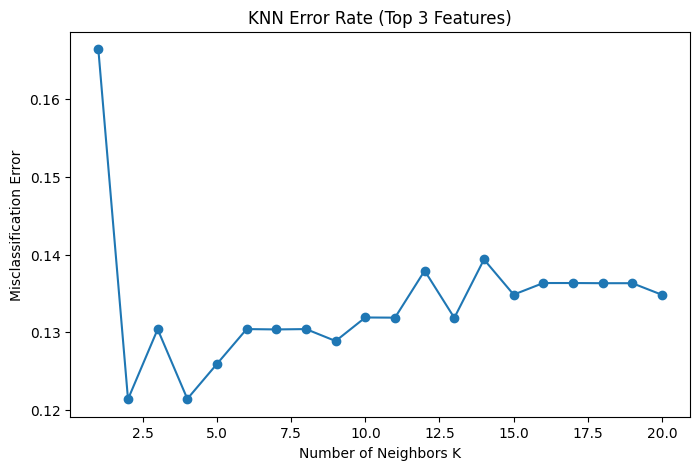


================ Top 5 Features ================

Accuracy: 0.8656716417910447

Confusion Matrix:
 [[109   6]
 [ 12   7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       115
           1       0.54      0.37      0.44        19

    accuracy                           0.87       134
   macro avg       0.72      0.66      0.68       134
weighted avg       0.85      0.87      0.85       134

Best K: 20


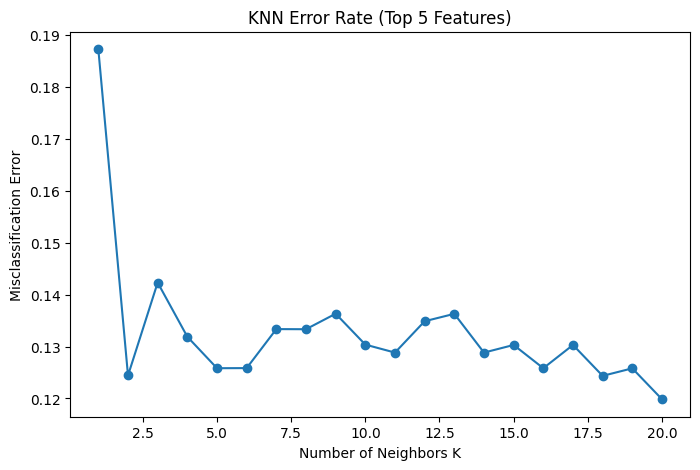


================ Top 14 Features ================

Accuracy: 0.8582089552238806

Confusion Matrix:
 [[111   4]
 [ 15   4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       115
           1       0.50      0.21      0.30        19

    accuracy                           0.86       134
   macro avg       0.69      0.59      0.61       134
weighted avg       0.83      0.86      0.83       134

Best K: 19


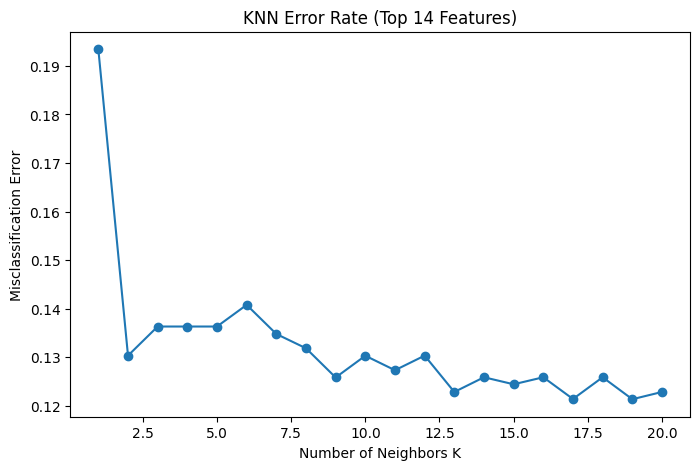


===== SUMMARY COMPARISON =====
Top 2 -> Accuracy: 0.89, Best K: 2
Top 3 -> Accuracy: 0.89, Best K: 2
Top 5 -> Accuracy: 0.87, Best K: 20
Top 14 -> Accuracy: 0.86, Best K: 19


In [17]:


# ----------------------------
# C. MODEL EVALUATION WITH FULL COMPARISON CODE (TOP 2, TOP 3, TOP 5 AND ALL DATA SET)
# ----------------------------





# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define feature subsets
feature_sets = {
    "Top 2": ['Total day minutes', 'Customer service calls'],
    "Top 3": ['Total day minutes', 'Customer service calls', 'Total day charge'],
    "Top 5": ['Total day minutes', 'Customer service calls', 'Total day charge',
              'Total intl calls', 'Total eve minutes'],
    "Top 14":['Account length',
    'Total day minutes', 'Total day calls', 'Total day charge',
    'Total eve minutes', 'Total eve calls', 'Total eve charge',
    'Total night minutes', 'Total night calls', 'Total night charge',
    'Total intl minutes', 'Total intl calls', 'Total intl charge',
    'Customer service calls']
}

results = {}

# Loop through each feature set
for name, features in feature_sets.items():
    print(f"\n================ {name} Features ================\n")

    # 1. Create dataset
    dataset = df[features + ['Churn']]

    # 2. Split into X (features) and y (target)
    X = dataset.drop('Churn', axis=1)
    y = dataset['Churn']

    # 3. Train/Test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # 4. Feature scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # 5. Fit KNN with k=3 as start
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    # 6. Predictions
    y_pred = knn.predict(X_test)

    # 7. Evaluation
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # 8. Cross-validation to find best K
    errors = []
    k_range = range(1, 21)
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        errors.append(1 - scores.mean())

    best_k = k_range[np.argmin(errors)]
    print("Best K:", best_k)

    # Save results
    results[name] = {"accuracy": acc, "best_k": best_k}

    # 9. Plot error rates
    plt.figure(figsize=(8,5))
    plt.plot(k_range, errors, marker='o')
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Misclassification Error')
    plt.title(f'KNN Error Rate ({name} Features)')
    plt.show()

# Final summary
print("\n===== SUMMARY COMPARISON =====")
for name, res in results.items():
    print(f"{name} -> Accuracy: {res['accuracy']:.2f}, Best K: {res['best_k']}")


In [ ]:
from google.colab import files

files.download('/content/your_notebook_name.ipynb')